In [1]:
from pytorch_lightning import seed_everything
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import math
import torch
# Ignore sklearn warning for now
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
sns.set_style("whitegrid")
seed_everything(42)

Global seed set to 42


42

In [2]:
import os
os.getcwd()

'/mnt/3106DB277DCCEAA5/Sync/Research/Coding/medicine/gods21/experiments/london'

In [3]:
samples_summary = pd.read_csv('../../../../../../../OneDrive_2023-02-10/Data-for-Cambridge/Biochemical-data/KCL_biochemical_data_2023_01_24.csv', index_col=0).iloc[:-1]
samples_summary = samples_summary.sort_index()
samples_summary = samples_summary.drop_duplicates()
samples_summary.index = samples_summary.index.astype(int)
samples_summary

,ACTH,ALP,ALT,AST,Albumin,Bilirubin,Cholesterol,Cortisol,Free fatty acids,Gamma GT,Glucose,HDL,HbA1c,Insulin,LDL,T3,T4,TSH
study_ID,,,,,,,,,,,,,,,,,,
1002,14.0,81.0,18.0,22.0,4.2,0.409357,162.162162,16.056542,470.0,65.0,88.288288,54.137664,5.2,6.1,96.674401,2.734375,1.289821,2.34
1003,14.0,62.0,26.0,23.0,4.2,0.526316,158.301158,8.046394,NaN,10.0,95.495495,50.270688,5.3,11.0,NaN,2.994792,1.165501,0.14
1004,20.0,79.0,28.0,30.0,4.4,0.350877,185.328185,3.008336,510.0,15.0,93.693694,27.068832,5.4,18.5,NaN,3.190104,1.010101,4.21
1005,24.0,87.0,29.0,33.0,4.3,0.818713,158.301158,6.850308,440.0,25.0,NaN,54.137664,5.5,2.0,92.807425,3.059896,1.406371,4.66
1008,13.0,55.0,26.0,28.0,3.8,0.350877,189.189189,7.538963,90.0,22.0,79.279279,42.536736,5.1,20.3,123.743233,2.734375,1.421911,2.75
1009,39.0,214.0,21.0,26.0,4.7,0.409357,154.440154,14.896702,640.0,15.0,90.090090,58.004640,5.6,16.0,77.339520,4.231771,0.924631,2.82
1010,24.0,85.0,37.0,33.0,4.6,0.643275,154.440154,6.342878,490.0,17.0,70.270270,58.004640,5.2,2.0,85.073473,4.492188,2.090132,0.06
1011,39.0,116.0,57.0,32.0,4.3,0.292398,208.494208,8.372599,NaN,38.0,82.882883,61.871616,5.1,7.6,NaN,3.971354,1.934732,0.01
1012,24.0,99.0,95.0,40.0,4.3,0.233918,258.687259,9.206234,NaN,127.0,82.882883,46.403712,6.1,8.7,NaN,3.255208,1.188811,2.76


In [4]:
bmi_summary = pd.read_csv('../../../../../../../OneDrive_2023-02-10/Data-for-Cambridge/Biochemical-data/all_data.csv', index_col=0)[['BMI (derived measure)', 'Weight category', 'Age', 'Sex']]
bmi_summary = bmi_summary.sort_index()
bmi_summary = bmi_summary.drop_duplicates()
bmi_summary.columns = ['BMI (derived)', 'Weight category', 'Age', 'Sex']
bmi_summary.index = bmi_summary.index.astype(int)
bmi_summary

,BMI (derived),Weight category,Age,Sex
study_ID,,,,
1001,NaN,NaN,NaN,NaN
1002,23.1,Normal Weight,27.0,Female
1003,29.3,Overweight,33.0,Female
1004,42.0,Obese,25.0,Male
1005,25.8,Overweight,30.0,Male
1008,37.4,Obese,32.0,Female
1009,21.7,Normal Weight,13.0,Male
1010,22.4,Normal Weight,19.0,Female
1011,29.6,Overweight,30.0,Male


In [5]:
# index = np.intersect1d(bmi_summary.index, samples_summary.index)
# bmi_summary = bmi_summary.T[index].T
# samples_summary = samples_summary.T[index].T

In [6]:
feature_names = samples_summary.columns
imputer = KNNImputer(n_neighbors=2, weights="uniform")
x = imputer.fit_transform(samples_summary)
x.shape, feature_names

((35, 18),
 Index(['ACTH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin', 'Cholesterol',
        'Cortisol', 'Free fatty acids', 'Gamma GT', 'Glucose', 'HDL', 'HbA1c',
        'Insulin', 'LDL', 'T3', 'T4', 'TSH'],
       dtype='object'))

In [7]:
seed_everything(42)
h_size = 100
encoder = torch.nn.Sequential(
    torch.nn.Linear(x.shape[1], h_size),
    torch.nn.BatchNorm1d(h_size),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(h_size, 2),
    torch.nn.BatchNorm1d(2)
)
decoder = torch.nn.Sequential(
    torch.nn.LeakyReLU(),
    torch.nn.Linear(2, h_size),
    torch.nn.BatchNorm1d(h_size),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(h_size, x.shape[1]),
)
model = torch.nn.Sequential(encoder, decoder)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
loss_form = torch.nn.MSELoss()
model.train()

Global seed set to 42


Sequential(
  (0): Sequential(
    (0): Linear(in_features=18, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=100, out_features=2, bias=True)
    (4): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Linear(in_features=2, out_features=100, bias=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=100, out_features=18, bias=True)
  )
)

In [8]:
seed_everything(42)
scaler_x = StandardScaler()
scaler_x.fit(x)
x_scaled = scaler_x.transform(x)
x_train = torch.FloatTensor(x_scaled)
for epoch in range(5001):
    # train step
    optimizer.zero_grad()
    x_latent = encoder(x_train)
    x_pred = decoder(x_latent)
    loss = loss_form(x_pred, x_train)
    loss.backward()
    optimizer.step()

    # compute MSE
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: MSE={loss:.4f}")

Global seed set to 42


Epoch 0: MSE=1.1470
Epoch 1000: MSE=0.0451
Epoch 2000: MSE=0.0283
Epoch 3000: MSE=0.0149
Epoch 4000: MSE=0.0118
Epoch 5000: MSE=0.0089


In [9]:
labels = ['Cholesterol>180' if v else 'Cholesterol<180' for v in samples_summary['Cholesterol'].values>180]
labels = []
for i in samples_summary.index:
    try:
        if bmi_summary.loc[i]['Weight category'] in ['Obese', 'Overweight']:
            labels.append('Overweight/Obese')
        else:
            labels.append('Normal Weight')
    except:
        labels.append('Normal Weight')
labels

['Normal Weight',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Normal Weight',
 'Normal Weight',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Normal Weight',
 'Overweight/Obese',
 'Normal Weight',
 'Normal Weight',
 'Overweight/Obese',
 'Normal Weight',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Normal Weight',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Overweight/Obese',
 'Normal Weight',
 'Normal Weight',
 'Normal Weight',
 'Normal Weight']

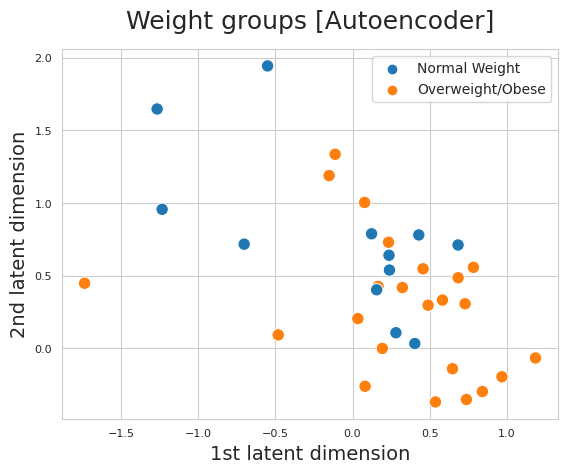

In [10]:
h = x_latent.detach().numpy()

plt.title("Weight groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_bmi.png', dpi = 400, bbox_inches='tight')

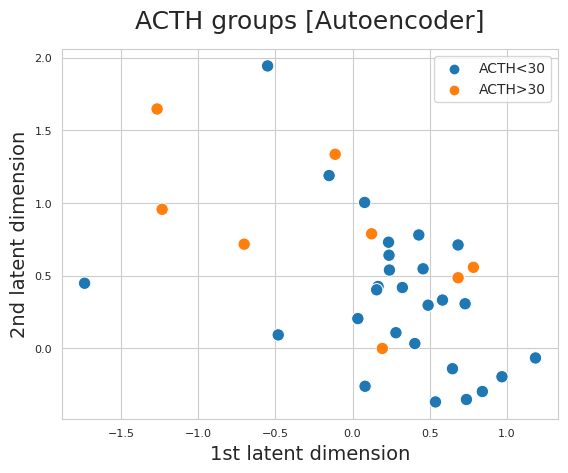

In [15]:
labels = ['ACTH>30' if v else 'ACTH<30' for v in samples_summary['ACTH'].values>30]
        
plt.title("ACTH groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_ACTH.png', dpi = 400, bbox_inches='tight')

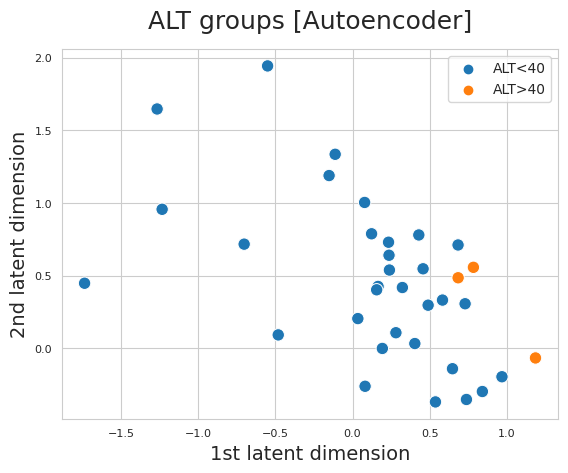

In [21]:
labels = ['ALT>40' if v else 'ALT<40' for v in samples_summary['ALT'].values>40]

plt.title("ALT groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_ALT.png', dpi = 400, bbox_inches='tight')

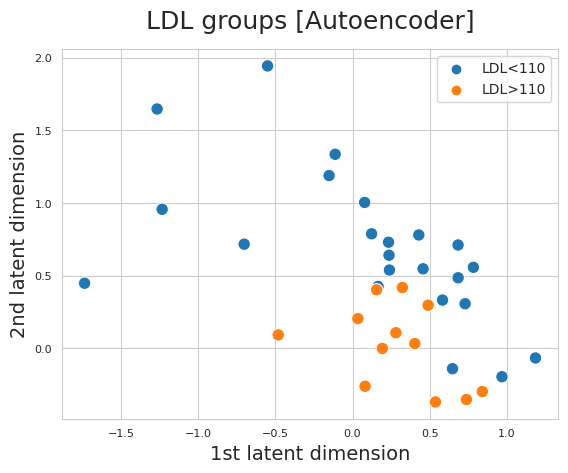

In [32]:
labels = ['LDL>110' if v else 'LDL<110' for v in samples_summary['LDL'].values>110]

plt.title("LDL groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_LDL.png', dpi = 400, bbox_inches='tight')

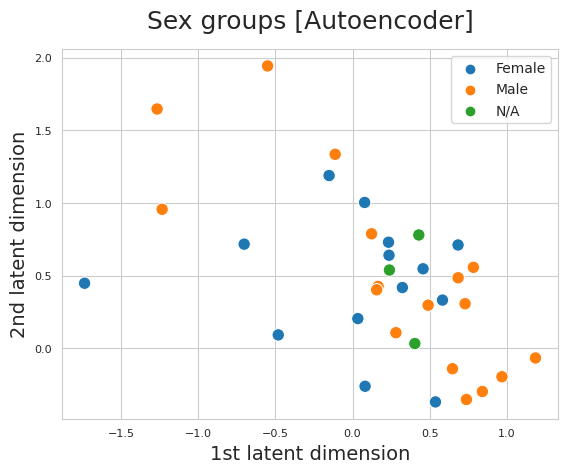

In [11]:
labels = []
for i in samples_summary.index:
    try:
        labels.append(bmi_summary.loc[i]['Sex'])
    except:
        labels.append('N/A')


plt.title("Sex groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_sex.png', dpi = 400, bbox_inches='tight')

In [ ]:
labels = []
for i in samples_summary.index:
    try:
        labels.append(int(bmi_summary.loc[i]['Age'])//10 * 10)
    except:
        labels.append('N/A')


plt.title("Age groups [Autoencoder]", fontsize=18, pad=15)
sns.scatterplot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.legend(title='Age')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_age.png', dpi = 400, bbox_inches='tight')

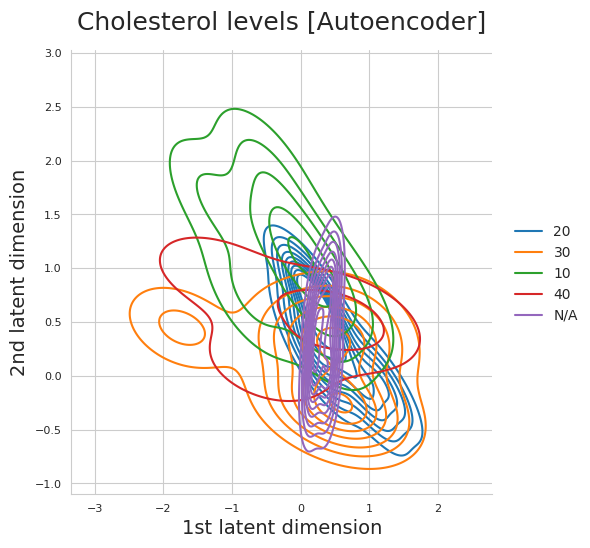

In [13]:
sns.displot(x=h[:, 0], y=h[:, 1], hue=labels, cmap='vlag', kind="kde")
plt.title("Cholesterol levels [Autoencoder]", fontsize=18, pad=15)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('autoencoder_latent_dist.png', dpi = 400, bbox_inches='tight')

In [14]:
from scipy.stats import multivariate_t
rv = multivariate_t([1.0, -0.5], [[2.1, 0.3], [0.3, 1.5]], df=2)
rv.

SyntaxError: invalid syntax (3714708744.py, line 3)

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', random_state=42)
h2 = tsne.fit_transform(x_scaled)

plt.figure()
plt.title("Cholesterol levels [TSNE]", fontsize=18, pad=15)
sns.scatterplot(x=h2[:, 0], y=h2[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('tsne_latent.png', dpi = 400, bbox_inches='tight')
plt.show()

In [ ]:
sns.displot(x=h2[:, 0], y=h2[:, 1], hue=labels, cmap='vlag', kind="kde")
plt.title("Cholesterol levels [TSNE]", fontsize=18, pad=15)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('tsne_latent_dist.png', dpi = 400, bbox_inches='tight')

In [ ]:
pca = PCA(n_components=2, random_state=42)
h3 = pca.fit_transform(x_scaled)

plt.figure()
plt.title("Cholesterol levels [PCA]", fontsize=18, pad=15)
sns.scatterplot(x=h3[:, 0], y=h3[:, 1], hue=labels, cmap='vlag', s=80)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('pca_latent.png', dpi = 400, bbox_inches='tight')
plt.show()

In [ ]:
sns.displot(x=h3[:, 0], y=h3[:, 1], hue=labels, cmap='vlag', kind="kde")
plt.title("Cholesterol levels [PCA]", fontsize=18, pad=15)
plt.xlabel('1st latent dimension', fontsize=14)
plt.ylabel('2nd latent dimension', fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('pca_latent_dist.png', dpi = 400, bbox_inches='tight')